In [66]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('eCommerce_data.csv', encoding = 'unicode_escape')
display(data.head())
display(data.dtypes)

display(data.isnull().all())
#No missing values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [90]:
data['DateTime'] = pd.to_datetime(data['InvoiceDate'])

data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
display(data.head())

print(np.unique(data.Country))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DateTime,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,08:26:00


['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brazil' 'Canada'
 'Channel Islands' 'Cyprus' 'Czech Republic' 'Denmark' 'EIRE'
 'European Community' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Iceland' 'Israel' 'Italy' 'Japan' 'Lebanon' 'Lithuania' 'Malta'
 'Netherlands' 'Norway' 'Poland' 'Portugal' 'RSA' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'USA' 'United Arab Emirates'
 'United Kingdom' 'Unspecified']


,Quantity
Date,
2010-12-01,26814
2010-12-02,21023
2010-12-03,14830
2010-12-05,16395
2010-12-06,21419
...,...
2011-12-05,44119
2011-12-06,29026
2011-12-07,39612


,Quantity
Date,
2011-06-14,-13752


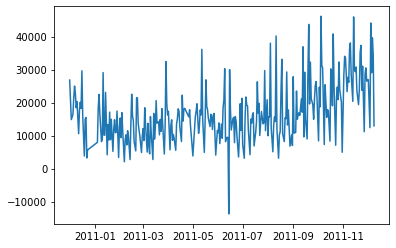

In [91]:
quantity_by_date = pd.DataFrame(data.groupby(by = 'Date')['Quantity'].sum())
display(quantity_by_date)

plt.plot(quantity_by_date)
#No apparent seasonality or cyclic behavior
#Possible slight upward trend

quantity_by_date[quantity_by_date.Quantity == quantity_by_date.Quantity.min()]
#No holidays or special occasions on June 14th, 2011, so the large quantity of sales appears random

0.8306626433361382
2.4402570209929866e-15


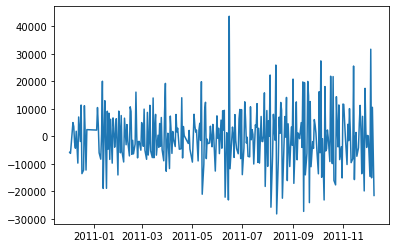

In [92]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(quantity_by_date.Quantity.values, autolag = 'AIC')
print(adf[1])
#p-value is very high, so fail to reject our null hypothesis; graph is nonstationary

#We'll difference the data once to make it stationary and view the data
differenced = quantity_by_date.diff()
plt.plot(differenced)
differenced = differenced.tail(differenced.shape[0]-1)
#The graph appears to be stationary

adf = adfuller(differenced.Quantity.values, autolag = 'AIC')
print(adf[1])
#P-value is 0, so reject the null hypothesis and claim our series is stationary, we can now do prediction
#We can now assume the only trend is towards that of both higher inventory purchase and sales based on quantity sold by day

I was considering preforming a K-Nearest Neighbors classification on the data in order to attempt to predict the country in which an order was placed, however the only relevant variables I could think to use would be Time, Description, and Date.
Certain countries will obviously more than likely order during business hours, and certain items like winter clothing will be ordered by countries based on their seasons (using the Date variable). As such with the few variables provided I'm not confident that the model would provide anything worthwhile beyond what common sense could already dictate, and that the model would end up predicting non-existent/incorrect trends due to the lack of data